In [1]:
import pandas as pd
from statsmodels.formula.api import ols

data = pd.read_csv('deflection.csv', sep=';')
model = ols('Deflection ~ Load', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Deflection   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.310e+06
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           1.77e-95
Time:                        22:29:24   Log-Likelihood:                 189.57
No. Observations:                  40   AIC:                            -375.1
Df Residuals:                      38   BIC:                            -371.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0061      0.001      8.623      0.000       0.005       0.008
Load        7.221e-07   3.97e-10   1819.289      0.000    7.21e-07    7.23e-07
==============================================================================
Omnibus:                        5.525   Durbin-Watson:                   0.146
Prob(Omnibus):                  0.063   Jarque-Bera (JB):                4.146
Skew:                          -0.657   Prob(JB):                        0.126
Kurtosis:                       2.126   Cond. No.                     3.73e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.73e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

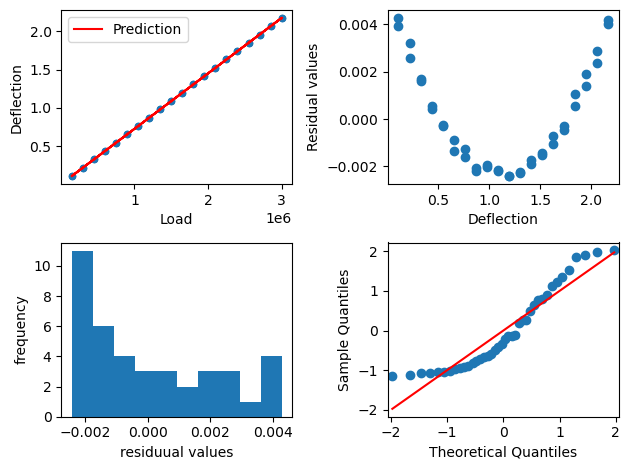

In [2]:
from scipy import stats
import matplotlib.pyplot as plt
import statsmodels.graphics.gofplots as sm
fig, axs = plt.subplots(2,2, squeeze=False)
data['Prediction'] = res.predict(data)
plt.tight_layout()

ax = data.plot.scatter(x='Load',y='Deflection', ax=axs[0,0])
data.plot(x='Load',y='Prediction', ax=axs[0,0], color='red')
# plt.subplot(2,2,2)
residuals = res.predict(data)-data['Deflection']
axs[0,1].scatter(data['Deflection'], (residuals))
axs[0,1].set_xlabel('Deflection')
axs[0,1].set_ylabel('Residual values')

axs[1,0].hist(residuals)
axs[1,0].set_ylabel('frequency')
axs[1,0].set_xlabel('residuual values')
plt.subplot(2,2,4)
sm.qqplot(residuals, stats.t, distargs=(4,), loc=3, scale=10, fit=True, ax=axs[1,1], line='s')
plt.tight_layout()

In [3]:
def print_residuals(data, res, feature):
    fig, axs = plt.subplots(2,2, squeeze=False)
    data['Prediction'] = res.predict(data)
    plt.tight_layout()

    ax = data.plot.scatter(x=feature,y='SalePrice', ax=axs[0,0])
    data.plot(x=feature,y='Prediction', ax=axs[0,0], color='red', style='s')
    # plt.subplot(2,2,2)
    residuals = res.predict(data)-data['SalePrice']
    axs[0,1].scatter(data[feature], (residuals))
    axs[0,1].set_xlabel(feature)
    axs[0,1].set_ylabel('Residual values')

    axs[1,0].hist(residuals)
    axs[1,0].set_ylabel('frequency')
    axs[1,0].set_xlabel('residuual values')
    plt.subplot(2,2,4)
    sm.qqplot(residuals, stats.t, distargs=(4,), loc=3, scale=10, fit=True, ax=axs[1,1], line='s')

ZADANIE DOMOWE

1. Spróbuj postępując zgodnie z przedstawioną metodą wyznaczyć model dla relacji między ceną sprzedaży nieruchomości (SalePrice) a GrLivArea

In [4]:
data = pd.read_csv('input/train.csv', sep=',')
data = data.drop(['Alley', 'PoolQC', 'Fence', 'MiscFeature'], axis=1)
data = data.dropna()

def remove_outliers(data, feature):
    q1 = data[feature].quantile(0.25)
    q3 = data[feature].quantile(0.75)

    IRQ = q3 - q1
    lower_bound = q1 - 1.5 * IRQ
    upper_bound = q3 + 1.5 * IRQ

    return  data[(data[feature] > lower_bound) & (data[feature] < upper_bound)]

data = remove_outliers(data, 'GrLivArea')
data = remove_outliers(data, 'SalePrice')

In [5]:
model = ols('SalePrice ~ GrLivArea', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.432
Model:                            OLS   Adj. R-squared:                  0.431
Method:                 Least Squares   F-statistic:                     419.2
Date:                Thu, 21 Dec 2023   Prob (F-statistic):           9.77e-70
Time:                        22:29:25   Log-Likelihood:                -6830.7
No. Observations:                 554   AIC:                         1.367e+04
Df Residuals:                     552   BIC:                         1.367e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.102e+04   9598.407      2.190      0.029    2170.893    3.99e+04
GrLivArea    113.2958      5.534     20.474      0.000     102.427     124.165
==============================================================================
Omnibus:                       51.504   Durbin-Watson:                   2.061
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               73.582
Skew:                           0.678   Prob(JB):                     1.05e-16
Kurtosis:                       4.160   Cond. No.                     7.14e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.14e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

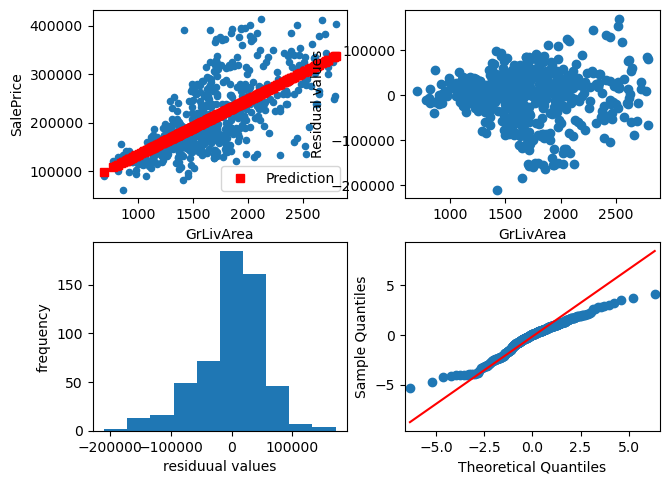

In [6]:
print_residuals(data, res, 'GrLivArea')

2. Spróbuj postępując zgodnie z przedstawioną metodą wyznaczyć model dla relacji między ceną sprzedaży nieruchomości (SalePrice) a OverallQual 3.

In [7]:
model = ols('SalePrice ~ C(OverallQual)', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.665
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     155.2
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          1.99e-125
Time:                        22:29:25   Log-Likelihood:                -6683.8
No. Observations:                 554   AIC:                         1.338e+04
Df Residuals:                     546   BIC:                         1.342e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept               9.1e+04   4.23e+04      2.150      0.032    7869.576    1.74e+05
C(OverallQual)[T.4]   3.221e+04   4.52e+04      0.712      0.477   -5.67e+04    1.21e+05
C(OverallQual)[T.5]   5.568e+04   4.26e+04      1.308      0.191   -2.79e+04    1.39e+05
C(OverallQual)[T.6]   7.609e+04   4.25e+04      1.792      0.074   -7300.840    1.59e+05
C(OverallQual)[T.7]   1.243e+05   4.25e+04      2.927      0.004    4.09e+04    2.08e+05
C(OverallQual)[T.8]    1.89e+05   4.25e+04      4.447      0.000    1.06e+05    2.73e+05
C(OverallQual)[T.9]    2.51e+05    4.3e+04      5.844      0.000    1.67e+05    3.35e+05
C(OverallQual)[T.10]  2.668e+05   4.57e+04      5.836      0.000    1.77e+05    3.57e+05
==============================================================================
Omnibus:                       33.511   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               49.613
Skew:                           0.469   Prob(JB):                     1.69e-11
Kurtosis:                       4.126   Cond. No.                         74.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

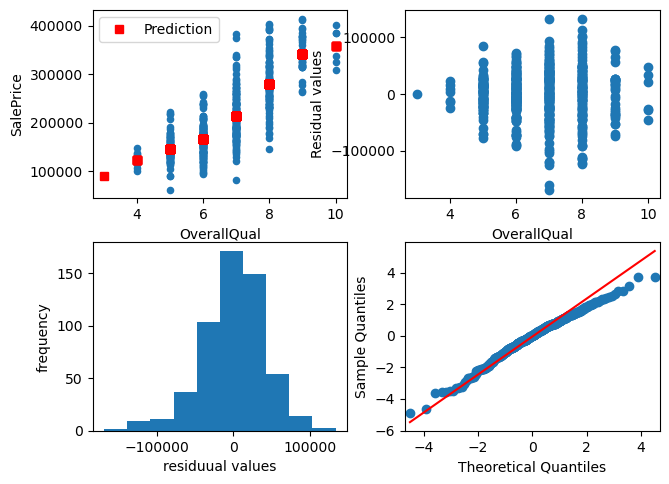

In [8]:
print_residuals(data, res, 'OverallQual')

3. Spróbuj wyznaczyć model który jest połączeniem modelu 1 i 2 oraz dodatkowo zawiera dane dotyczące i TotalBsmtSF (model powinien być sumą etykiet poszczególnych kolumn)

In [9]:
import numpy as np
data['OverallQual'] = data['OverallQual'].apply(lambda x: 1 if x < 7 else x)
# data['GrLivArea'] = data['GrLivArea'] **2
model = ols('SalePrice ~ C(OverallQual) + GrLivArea + TotalBsmtSF', data=data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              SalePrice   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     386.8
Date:                Thu, 21 Dec 2023   Prob (F-statistic):          4.01e-193
Time:                        22:29:25   Log-Likelihood:                -6528.2
No. Observations:                 554   AIC:                         1.307e+04
Df Residuals:                     547   BIC:                         1.310e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept             1.456e+04   7144.933      2.038      0.042     528.361    2.86e+04
C(OverallQual)[T.7]   3.225e+04   3462.112      9.314      0.000    2.54e+04     3.9e+04
C(OverallQual)[T.8]    7.17e+04   4406.717     16.271      0.000     6.3e+04    8.04e+04
C(OverallQual)[T.9]   1.201e+05   6850.125     17.537      0.000    1.07e+05    1.34e+05
C(OverallQual)[T.10]  1.199e+05   1.38e+04      8.703      0.000    9.29e+04    1.47e+05
GrLivArea               64.7062      3.635     17.803      0.000      57.567      71.846
TotalBsmtSF             47.8218      4.349     10.996      0.000      39.279      56.365
==============================================================================
Omnibus:                       31.085   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              100.130
Skew:                           0.090   Prob(JB):                     1.81e-22
Kurtosis:                       5.075   Cond. No.                     2.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

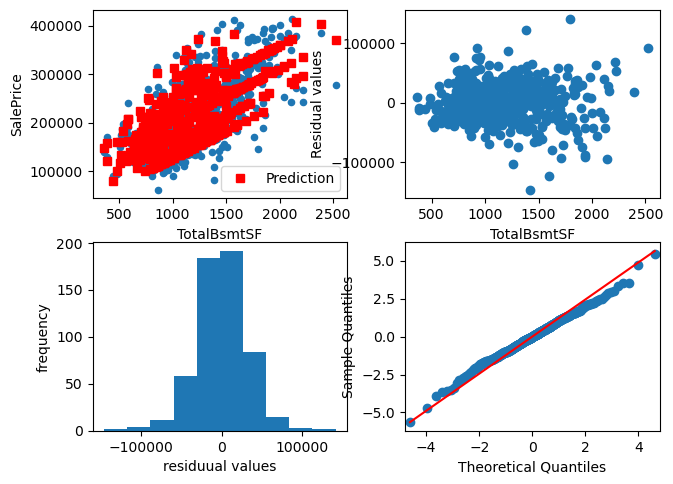

In [10]:
print_residuals(data, res, 'TotalBsmtSF')

4. Dla każdego modelu oceń jak zmienia się wariancji wartości residuów oraz statystyki. Czy model 3 dał istotną poprawę jakości dopasowanie, zmniejszył wariancję?

Najniższe wartości residuów udało się osiągnąć dla pierwotnych modeli, jednak model 3. posiada rozkład najbardziej podobny do rozkładu normalnego.

5. Na podstawie własnej analizy z poprzednich zajęć wybierz 4 cechy, które twoim zdaniem będą najlepiej reprezentowały cenę i stosując metodę z poprzednich zajęć (las drzew) spróbuj ocenić dokładność regresji w porównaniu z wynikami modeli 1,2,3. W tym celu wyznacz wartość R2 (do tego celu możesz wykorzystać from sklearn.metrics import r2_score, lub zaimplementować odpowiednie wyrażenie zgodnie ze wzorem)

In [11]:
xcorr_features = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea']

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

df_train = pd.read_csv('input/train.csv')
df_train.set_index('Id', inplace=True)

df_train = remove_outliers(df_train, 'GrLivArea')
df_train = remove_outliers(df_train, 'SalePrice')

df_test = pd.read_csv('input/test.csv')
df_test.set_index('Id', inplace=True)

df_test_saleprice = pd.read_csv('input/sample_submission.csv')
df_test_saleprice.set_index('Id', inplace=True)

def xcorr_score(x_train, x_valid, y_train, y_valid):
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(x_train, y_train)
    preds = model.predict(x_valid)
    return r2_score(y_valid, preds)

def res_score(data, res):
    data['Prediction'] = res.predict(data)
    return r2_score(data['SalePrice'], res.predict(data))


In [13]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()

df_test['SalePrice'] = df_test_saleprice['SalePrice']

df_test[xcorr_features] = df_test[xcorr_features].replace('', np.nan)



for column in xcorr_features:

    df_train = df_train.dropna(subset=[column])
    df_test = df_test.dropna(subset=[column])


    if df_train[column].dtype == 'object':
        df_train[column] = label_encoder.fit_transform(df_train[column])

    if df_test[column].dtype == 'object':
        df_test[column] = label_encoder.transform(df_test[column])



In [14]:
print('Błąd dla cech z macierzy korelacji: ', xcorr_score(df_train[xcorr_features], df_test[xcorr_features], df_train['SalePrice'], df_test['SalePrice']))

Błąd dla cech z macierzy korelacji:  -10.94947025846116


In [15]:
model = ols('SalePrice ~ GrLivArea', data=data)
res = model.fit()

print('Błąd dla cech z modelu GrLivArea: ', res_score(data, res))

model = ols('SalePrice ~ C(OverallQual)', data=data)
res = model.fit()

print('Błąd dla cech z modelu C(OverallQual): ', res_score(data, res))

model = ols('SalePrice ~ C(OverallQual) + GrLivArea + TotalBsmtSF', data=data)
res = model.fit()

print('Błąd dla cech z modelu C(OverallQual) + GrLivArea + TotalBsmtSF: ', res_score(data, res))

Błąd dla cech z modelu GrLivArea:  0.43163300128378446
Błąd dla cech z modelu C(OverallQual):  0.6529202279052546
Błąd dla cech z modelu C(OverallQual) + GrLivArea + TotalBsmtSF:  0.8092482461652302
